In [1]:
%matplotlib inline

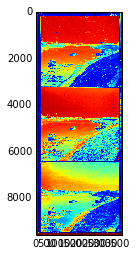

In [2]:
# Fem totes les importacions de les llibreries per a les dues parts de la practica
import numpy as np
import matplotlib.pyplot as plt
import math 
from skimage import io
from scipy import misc, fftpack, signal
from PIL import Image, ImageDraw, ImageEnhance
from scipy import ndimage 
from scipy.misc import imresize 

# Carreguem i mostrem l'imatge
image = io.imread('00029u.png')
plt.imshow(image)

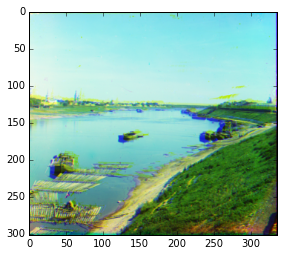

In [3]:

#LOAD IMAGES 
img = Image.open("00029u.png") 
#WARNING SIZE AND SHAPE INDICES ARE UPSIDE DOWN  
size1_size=int(round(img.size[1]/10)) 
size2_size=int(round(img.size[0]/10)) 
img = imresize(img, ( size1_size,size2_size),interp
='bilinear').astype('float') 
img_np = np.array(img) 
x1 = 20; y1 = 20; 
x2 = 25; y2 = 333; 
x3 = 24; y3 = 647; 
w = 336; h = 302; 
im1 = img_np[y1-2:y1+h-2,x1-1:x1+w-1]; 
im2 = img_np[y2-2:y2+h-2,x2-1:x2+w-1]; 
im3 = img_np[y3-2:y3+h-2,x3-1:x3+w-1]; 
I1 = 256*im1.astype('double')/im1.max(); 
I2 = 256*im2.astype('double')/im2.max(); 
I3 = 256*im3.astype('double')/im3.max(); 
BGR=np.zeros([h,w,3],dtype=type(img_np[0,0]))  
BGR[:,:,0]=I3 
BGR[:,:,1]=I2 
BGR[:,:,2]=I1

# Formalizamos la imagen BGR
BGR[:,:,0] = ((BGR[:,:,0] - BGR[:,:,0].min()) / (BGR[:,:,0].max() - BGR[:,:,0].min()))
BGR[:,:,1] = ((BGR[:,:,1] - BGR[:,:,1].min()) / (BGR[:,:,1].max() - BGR[:,:,1].min()))
BGR[:,:,2] = ((BGR[:,:,2] - BGR[:,:,2].min()) / (BGR[:,:,2].max() - BGR[:,:,2].min()))

plt.imshow(BGR)

In [4]:
# Funcio que extreura els barquets de la image generica BGR
def extreurebarquet(image, bloc, zona):
    centreX = 140
    centreY = 165
    # Treiem les coordenades maximes i minimes, que ens va donar el profesor a clase, per treure una area del barquet per escanejar
    # a aquesta area li fiquem el tamany del bloc i el tamany de la zona
    xmin=centreX-bloc-zona
    xmax=centreX+bloc+zona
    ymin=centreY-bloc-zona
    ymax=centreY+bloc+zona
    
    # Amb les coordenades anteriors treiem de la imatge principal el bloc on esta el barquet dels tres canals
    barquetB=BGR[ymin:ymax,xmin:xmax,0]
    barquetG=BGR[ymin:ymax,xmin:xmax,1]
    barquetR=BGR[ymin:ymax,xmin:xmax,2]
    
    # Formalitzem amb la mitja totes les imatges dels barquets
    barquetB = ((barquetB - barquetB.min()) / (barquetB.max() - barquetB.min()))-np.mean(barquetB)
    barquetG = ((barquetG - barquetG.min()) / (barquetG.max() - barquetG.min()))-np.mean(barquetG)
    barquetR = ((barquetR - barquetR.min()) / (barquetR.max() - barquetR.min()))-np.mean(barquetR)
    return barquetB,barquetG,barquetR

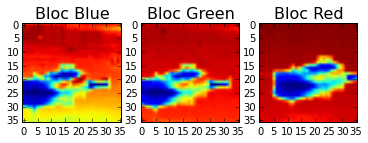

In [5]:
barquetB,barquetG,barquetR = extreurebarquet(BGR,15,3)
# Mostrem les imatges dels barquets per canals
plt.subplot(1,3,1)
plt.imshow(barquetB)
plt.title('Bloc Blue', size=16)
plt.subplot(1,3,2)
plt.imshow(barquetG)
plt.title('Bloc Green', size=16)
plt.subplot(1,3,3)
plt.imshow(barquetR)
plt.title('Bloc Red', size=16)


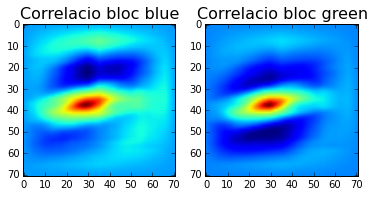

In [6]:
# Fem la correlacio entre els blocks i el template (Bloc vermell), mostrem els resultats
NCCRB=signal.correlate2d(barquetB.astype('float'), barquetR.astype('float'), mode='full', boundary='fill', fillvalue=0)
NCCRG=signal.correlate2d(barquetG.astype('float'), barquetR.astype('float'), mode='full', boundary='fill', fillvalue=0)
plt.subplot(1,2,1)
plt.imshow(NCCRB)
plt.title('Correlacio bloc blue', size=16)
plt.subplot(1,2,2)
plt.imshow(NCCRG)
plt.title('Correlacio bloc green', size=16)

In [7]:
# Funcio que trobara el punt maxim de la correlacio i retornara el vector que s'ha de desplaçar
def posmax(NCC1,mig):
    rows, columns = np.where(NCC1 == NCC1.max())
    # Agafem el punt mig de la imatge de correlacio.
    puntmig = mig
    return puntmig-rows[0], puntmig-columns[0]

posicioXRB, posicioYRB = posmax(NCCRB,np.shape(NCCRB)[0]/2)
posicioXRG, posicioYRG = posmax(NCCRG,np.shape(NCCRG)[0]/2)
print "Desplaçament canal Blau (dx,dy): ",posicioXRB, posicioYRB
print "Desplaçament canal Verd (dx,dy): ",posicioXRG, posicioYRG

Desplaçament canal Blau (dx,dy):  -2 6
Desplaçament canal Verd (dx,dy):  -2 6


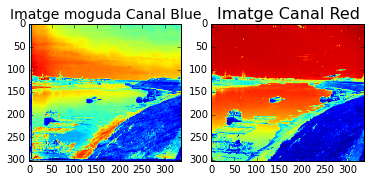

In [8]:
# Funcio que moure l'imatge al centre
def moureimatge(x,y,imatge):
    imatgeX = np.roll(imatge, x)
    imatge2 = np.roll(imatgeX, y, axis=0) 
    return imatge2

BGR[:,:,0] = moureimatge(posicioYRB,posicioXRB,BGR[:,:,0])
plt.subplot(1,2,1)
plt.imshow(BGR[:,:,0])
plt.title('Imatge moguda Canal Blue', size=14)
plt.subplot(1,2,2)
plt.imshow(BGR[:,:,2])
plt.title('Imatge Canal Red', size=16)

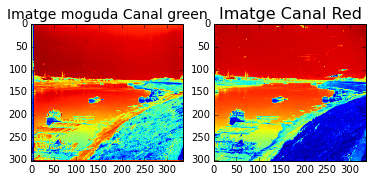

In [9]:
BGR[:,:,1]=moureimatge(posicioYRG,posicioXRG,BGR[:,:,1])
plt.subplot(1,2,1)
plt.imshow(BGR[:,:,1])
plt.title('Imatge moguda Canal green', size=14)
plt.subplot(1,2,2)
plt.imshow(BGR[:,:,2])
plt.title('Imatge Canal Red', size=16)

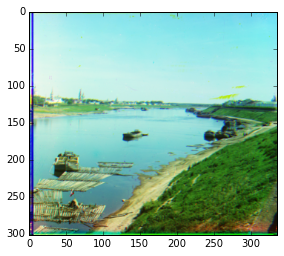

In [10]:
plt.imshow(BGR)

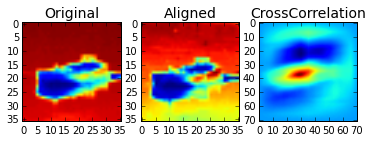

In [11]:
barquetB2,barquetG2,barquetR2=extreurebarquet(BGR,15,3)
plt.subplot(1,3,1)
plt.imshow(barquetR)
plt.title('Original', size=14)
plt.subplot(1,3,2)
plt.imshow(barquetB2)
plt.title('Aligned', size=14)
plt.subplot(1,3,3)
plt.imshow(NCCRB)
plt.title('CrossCorrelation', size=14)

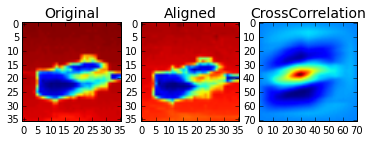

In [12]:
plt.subplot(2,3,1)
plt.imshow(barquetR)
plt.title('Original', size=14)
plt.subplot(2,3,2)
plt.imshow(barquetG2)
plt.title('Aligned', size=14)
plt.subplot(2,3,3)
plt.imshow(NCCRG)
plt.title('CrossCorrelation', size=14)

In [13]:
####################################################
############ Segona part de la practica ############
####################################################

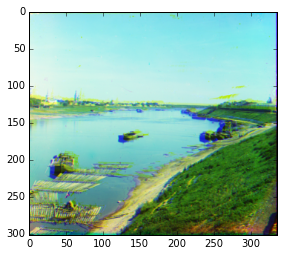

In [14]:
#LOAD IMAGES 
img = Image.open("00029u.png") 
#WARNING SIZE AND SHAPE INDICES ARE UPSIDE DOWN  
size1_size=int(round(img.size[1]/10)) 
size2_size=int(round(img.size[0]/10)) 
img = imresize(img, ( size1_size,size2_size),interp
='bilinear').astype('float') 
img_np = np.array(img) 
x1 = 20; y1 = 20; 
x2 = 25; y2 = 333; 
x3 = 24; y3 = 647; 
w = 336; h = 302; 
im1 = img_np[y1-2:y1+h-2,x1-1:x1+w-1]; 
im2 = img_np[y2-2:y2+h-2,x2-1:x2+w-1]; 
im3 = img_np[y3-2:y3+h-2,x3-1:x3+w-1]; 
I1 = 256*im1.astype('double')/im1.max(); 
I2 = 256*im2.astype('double')/im2.max(); 
I3 = 256*im3.astype('double')/im3.max(); 
BGR=np.zeros([h,w,3],dtype=type(img_np[0,0]))  
BGR[:,:,0]=I3 
BGR[:,:,1]=I2 
BGR[:,:,2]=I1

# Formalizamos la imagen BGR
BGR[:,:,0] = ((BGR[:,:,0] - BGR[:,:,0].min()) / (BGR[:,:,0].max() - BGR[:,:,0].min()))
BGR[:,:,1] = ((BGR[:,:,1] - BGR[:,:,1].min()) / (BGR[:,:,1].max() - BGR[:,:,1].min()))
BGR[:,:,2] = ((BGR[:,:,2] - BGR[:,:,2].min()) / (BGR[:,:,2].max() - BGR[:,:,2].min()))

plt.imshow(BGR)

In [15]:
# Funcio que et troba la gaussiana, segons un nombre sigma
def gaussian(sigma):
    masksize=6*sigma+1 
    Igaussian=[[masksize]*masksize for x in range(masksize)]
    x0=float(masksize)/2.0
    y0=float(masksize)/2.0
    for x in range (0, masksize):
        for y in range (0, masksize):
            # Apliquem la formula de la gaussiana pas per pas
            esquer=(((x-x0)**2)/(2*(sigma**2)))
            dret=(((y-y0)**2)/(2*(sigma**2)))
            suma=esquer+dret
            Igaussian[x][y]=math.exp(-suma)

    A=1/np.sum(Igaussian)
    print (A)
    for x in range (0, masksize):
        for y in range (0, masksize):
            Igaussian[x][y]=A*Igaussian[x][y]
            
    return Igaussian

# funcio que envies una imatge i et retorna l'imatge filtrada amb un filtre gauss, i reduida amb 1 de cada X pixels
def gauss_factor(imagen,sigma,X,Y, factor):
    # Executo la funcio que ens crea la gaussiana
    gauss=gaussian(sigma)
    
    # Creem les matrius per fer el filtre amb zeros
    fitr = np.zeros((X,Y,1))
    
    # Convoluciono les imatges per treure el pasa Baix
    fitr=signal.convolve2d(imagen,gauss,mode='same')
    
    return fitr[0::factor,0::factor]     # retornem un de cada X pixels

0.00998460586314
0.00998460586314
0.00998460586314
Desplaçament canal Blau (dx,dy):  0 0
Desplaçament canal Verd (dx,dy):  0 0
0.0399020015805
0.0399020015805
0.0399020015805
Desplaçament canal Blau (dx,dy):  -1 3
Desplaçament canal Verd (dx,dy):  -1 3
0.159443364039
0.159443364039
0.159443364039
Desplaçament canal Blau (dx,dy):  -1 4
Desplaçament canal Verd (dx,dy):  -1 3


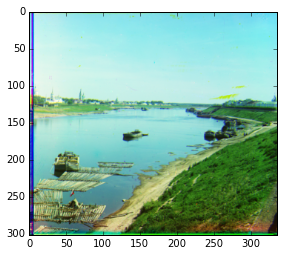

In [16]:
import scipy

def piramidal(imatge, factor):
    bloc = 15 * factor
    zona = 3 * factor
    sigma = factor
    
    # Extreiem el barquet
    barquetB4,barquetG4,barquetR4 = extreurebarquet(imatge,bloc,zona) 
    
    # Aixo o faig perque aixi comproba que amb la imatge treient-li els pixels es mou correctament
    #fitr = np.zeros((np.shape(imatge)[0]/factor,np.shape(imatge)[1]/factor,3))
    
    #fitr[:,:,0] = imatge[0::factor,0::factor,0]
    #fitr[:,:,1] = imatge[0::factor,0::factor,1]
    #fitr[:,:,2] = imatge[0::factor,0::factor,2]
    
    # Truquem a la funcio gauss perque ens retorni els 3 canals amb pixels 1 de cada factor
    barquetG4gauss = gauss_factor(barquetG4,sigma,np.shape(barquetG4)[0],np.shape(barquetG4)[1], factor)
    barquetB4gauss = gauss_factor(barquetB4,sigma,np.shape(barquetB4)[0],np.shape(barquetB4)[1], factor)
    barquetR4gauss = gauss_factor(barquetR4,sigma,np.shape(barquetR4)[0],np.shape(barquetR4)[1], factor)  
    
    # Fem la correlacio entre els blocks i el template (Bloc vermell), mostrem els resultats
    NCCRB4=signal.correlate2d(barquetB4gauss.astype('float'), barquetR4gauss.astype('float'), mode='full', boundary='fill', fillvalue=0)
    NCCRG4=signal.correlate2d(barquetG4gauss.astype('float'), barquetR4gauss.astype('float'), mode='full', boundary='fill', fillvalue=0)    
    
    # Treiem el centre de la correlacio, que sera el punt amb el maxim, aquest punt ens donara un vector, que sera el vector de desplaçament
    posicioXRB, posicioYRB = posmax(NCCRB4,np.shape(NCCRB4)[1]/2)
    posicioXRG, posicioYRG = posmax(NCCRG4,np.shape(NCCRG4)[1]/2)

    print "Desplaçament canal Blau (dx,dy): ",posicioXRB, posicioYRB
    print "Desplaçament canal Verd (dx,dy): ",posicioXRG, posicioYRG
    
    # Movem l'imatge amb el vector de desplaçament que hem calculat
    #fitr[:,:,0] = moureimatge(posicioYRB,posicioXRB,fitr[:,:,0])
    #fitr[:,:,1] = moureimatge(posicioYRG,posicioXRG,fitr[:,:,1])
    imatge[:,:,0] = moureimatge(posicioYRB,posicioXRB,imatge[:,:,0])
    imatge[:,:,1] = moureimatge(posicioYRG,posicioXRG,imatge[:,:,1])
    
    plt.subplot(1,1,1)
    plt.imshow(imatge) 
    return imatge
   
factor4=piramidal(BGR, 4)
factor2=piramidal(factor4, 2)
imatgefinal=piramidal(factor2, 1)

scipy.misc.imsave('imatgefinal.jpg', imatgefinal)

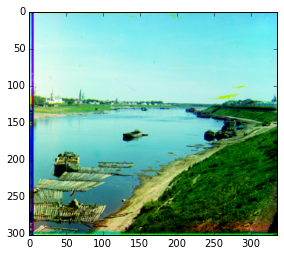

In [17]:
from skimage import data, img_as_float
from skimage import exposure
#Escalem els rangs d'intensitat de la imatge
img_intensitat = exposure.rescale_intensity(imatgefinal, in_range=(0.16, 0.98)) 
plt.imshow(img_intensitat) 
scipy.misc.imsave('img_intensitat.jpg', img_intensitat)

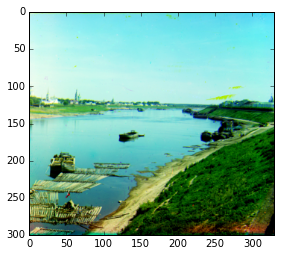

In [19]:
img_intensitatB=img_intensitat[0:300,6:350,0]
img_intensitatG=img_intensitat[0:300,6:350,1]
img_intensitatR=img_intensitat[0:300,6:350,2]
img_intensitat_fi = np.zeros((300,330,3))
img_intensitat_fi[:,:,0]=img_intensitatB
img_intensitat_fi[:,:,1]=img_intensitatG
img_intensitat_fi[:,:,2]=img_intensitatR
plt.imshow(img_intensitat_fi)
scipy.misc.imsave('Imatge_definitiva.jpg', img_intensitat_fi)